# Spam Detection Project
This notebook will guide you through the process of building a text classification system for spam detection.

In [11]:
# Import necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch the Spambase dataset
spambase = fetch_ucirepo(id=94)

# Extract features and targets
X = spambase.data.features
y = spambase.data.targets

# Display metadata and variable information
print(spambase.metadata)
print(spambase.variables)

# Display the first few rows of the dataset
X.head()

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8208469055374593
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.73      0.82       531
           1       0.72      0.95      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921

Confusion Matrix:
 [[387 144]
 [ 21 369]]


c:\Users\Hp\NLP_Project\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# Check for missing values in the dataset
missing_values = X.isnull().sum()
print("Missing values in each feature:\n", missing_values)

# Total number of missing values
total_missing = missing_values.sum()
print(f"\nTotal number of missing values in the dataset: {total_missing}")

Missing values in each feature:
 word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_fr

In [14]:
# Example new data point 
new_data = [[0.0, 0.64, 0.64, 0.0, 0.32, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.756, 61, 278]]

# Predict the class of the new data point
prediction = model.predict(new_data)

# Output the prediction
print("Prediction for the new message:", "Spam" if prediction[0] == 1 else "Not Spam")

Prediction for the new message: Spam


c:\Users\Hp\NLP_Project\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [15]:
# Example new data points (randomly generated for demonstration)
new_data_points = [
    [0.0, 0.64, 0.64, 0.0, 0.32, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.756, 61, 278],
    [0.21, 0.28, 0.50, 0.0, 0.14, 0.28, 0.21, 0.07, 0.0, 0.94, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.114, 101, 1028],
    [0.06, 0.0, 0.71, 0.0, 1.23, 0.19, 0.19, 0.12, 0.64, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.821, 485, 2259],
    [0.0, 0.0, 0.0, 0.0, 0.63, 0.0, 0.31, 0.63, 0.31, 0.63, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.537, 40, 191],
    [0.0, 0.0, 0.0, 0.0, 0.63, 0.0, 0.31, 0.63, 0.31, 0.63, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.537, 40, 191]
]

# Predict the class of each new data point
predictions = model.predict(new_data_points)

# Output the predictions
for i, prediction in enumerate(predictions):
    print(f"Prediction for data point {i+1}: {'Spam' if prediction == 1 else 'Not Spam'}")

Prediction for data point 1: Spam
Prediction for data point 2: Spam
Prediction for data point 3: Spam
Prediction for data point 4: Spam
Prediction for data point 5: Spam


c:\Users\Hp\NLP_Project\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [16]:
# Example new data points with more variety
new_data_points = [
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1, 1],  # Likely Not Spam
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 2.0, 2, 2],  # Likely Not Spam
    [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 5.0, 5, 5],  # Uncertain
    [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 9.0, 9, 9],  # Likely Spam
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 10.0, 10, 10]  # Likely Spam
]

# Predict the class of each new data point
predictions = model.predict(new_data_points)

# Output the predictions
for i, prediction in enumerate(predictions):
    print(f"Prediction for data point {i+1}: {'Spam' if prediction == 1 else 'Not Spam'}")

Prediction for data point 1: Spam
Prediction for data point 2: Not Spam
Prediction for data point 3: Not Spam
Prediction for data point 4: Not Spam
Prediction for data point 5: Not Spam


c:\Users\Hp\NLP_Project\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


**SVM Model Training and Evaluation**

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_y_pred = svm_model.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_report = classification_report(y_test, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)

print(f"SVM Accuracy: {svm_accuracy}")
print("SVM Classification Report:\n", svm_report)
print("SVM Confusion Matrix:\n", svm_conf_matrix)

c:\Users\Hp\NLP_Project\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy: 0.9229098805646037
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       531
           1       0.93      0.88      0.91       390

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921

SVM Confusion Matrix:
 [[506  25]
 [ 46 344]]


In [18]:
# Example new data points (randomly generated for demonstration)
new_data_points = [
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1, 1],  # Likely Not Spam
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 2.0, 2, 2],  # Likely Not Spam
    [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 5.0, 5, 5],  # Uncertain
    [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 9.0, 9, 9],  # Likely Spam
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 10.0, 10, 10]  # Likely Spam
]

# Predict the class of each new data point using SVM
svm_predictions = svm_model.predict(new_data_points)

# Output the predictions
for i, prediction in enumerate(svm_predictions):
    print(f"SVM Prediction for data point {i+1}: {'Spam' if prediction == 1 else 'Not Spam'}")

SVM Prediction for data point 1: Not Spam
SVM Prediction for data point 2: Not Spam
SVM Prediction for data point 3: Not Spam
SVM Prediction for data point 4: Not Spam
SVM Prediction for data point 5: Not Spam


c:\Users\Hp\NLP_Project\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


**Smaller Dataset with RBF Kernel**

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM classifier with the RBF kernel
svm_model = SVC(kernel='rbf', random_state=42)

# Train the SVM model on the entire training dataset
svm_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
svm_y_pred = svm_model.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_report = classification_report(y_test, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)

print(f"SVM Accuracy: {svm_accuracy}")
print("SVM Classification Report:\n", svm_report)
print("SVM Confusion Matrix:\n", svm_conf_matrix)

SVM Accuracy: 0.6623235613463626
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.84      0.74       531
           1       0.66      0.42      0.51       390

    accuracy                           0.66       921
   macro avg       0.66      0.63      0.63       921
weighted avg       0.66      0.66      0.64       921

SVM Confusion Matrix:
 [[448  83]
 [228 162]]


**Logistic Regression Model Training and Evaluation**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression classifier
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the Logistic Regression model
logistic_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
logistic_y_pred = logistic_model.predict(X_test)

# Evaluate the Logistic Regression model
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
logistic_report = classification_report(y_test, logistic_y_pred)
logistic_conf_matrix = confusion_matrix(y_test, logistic_y_pred)

print(f"Logistic Regression Accuracy: {logistic_accuracy}")
print("Logistic Regression Classification Report:\n", logistic_report)
print("Logistic Regression Confusion Matrix:\n", logistic_conf_matrix)

Logistic Regression Accuracy: 0.9207383279044516
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.88      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921

Logistic Regression Confusion Matrix:
 [[505  26]
 [ 47 343]]


c:\Users\Hp\NLP_Project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# Example new data points (randomly generated for demonstration)
new_data_points = [
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1, 1],  # Likely Not Spam
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 2.0, 2, 2],  # Likely Not Spam
    [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 5.0, 5, 5],  # Uncertain
    [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 9.0, 9, 9],  # Likely Spam
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 10.0, 10, 10]  # Likely Spam
]

# Predict the class of each new data point using Logistic Regression
logistic_predictions = logistic_model.predict(new_data_points)

# Output the predictions
for i, prediction in enumerate(logistic_predictions):
    print(f"Logistic Regression Prediction for data point {i+1}: {'Spam' if prediction == 1 else 'Not Spam'}")

Logistic Regression Prediction for data point 1: Not Spam
Logistic Regression Prediction for data point 2: Not Spam
Logistic Regression Prediction for data point 3: Not Spam
Logistic Regression Prediction for data point 4: Not Spam
Logistic Regression Prediction for data point 5: Not Spam


c:\Users\Hp\NLP_Project\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Random Forest Model Training and Evaluation**

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
random_forest_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
rf_y_pred = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

print(f"Random Forest Accuracy: {rf_accuracy}")
print("Random Forest Classification Report:\n", rf_report)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 0.9554831704668838
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.98      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921

Random Forest Confusion Matrix:
 [[522   9]
 [ 32 358]]


In [23]:
# Predict the class of each new data point using Random Forest
rf_predictions = random_forest_model.predict(new_data_points)

# Output the predictions
for i, prediction in enumerate(rf_predictions):
    print(f"Random Forest Prediction for data point {i+1}: {'Spam' if prediction == 1 else 'Not Spam'}")

Random Forest Prediction for data point 1: Not Spam
Random Forest Prediction for data point 2: Not Spam
Random Forest Prediction for data point 3: Not Spam
Random Forest Prediction for data point 4: Not Spam
Random Forest Prediction for data point 5: Not Spam


c:\Users\Hp\NLP_Project\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**XGBoost Model Training and Evaluation**

In [24]:
from xgboost import XGBClassifier, DMatrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert DataFrame to NumPy array
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

# Ensure feature names are strings without special characters
feature_names = [f"feature_{i}" for i in range(X_train_np.shape[1])]

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train_np, y_train.values.ravel())

# Make predictions on the test set
xgb_y_pred = xgb_model.predict(X_test_np)

# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_report = classification_report(y_test, xgb_y_pred)
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)

print(f"XGBoost Accuracy: {xgb_accuracy}")
print("XGBoost Classification Report:\n", xgb_report)
print("XGBoost Confusion Matrix:\n", xgb_conf_matrix)

c:\Users\Hp\NLP_Project\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:10:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9587404994571118
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       531
           1       0.97      0.94      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.96      0.96       921
weighted avg       0.96      0.96      0.96       921

XGBoost Confusion Matrix:
 [[518  13]
 [ 25 365]]


In [25]:
# Predict the class of each new data point using XGBoost
xgb_predictions = xgb_model.predict(new_data_points)

# Output the predictions
for i, prediction in enumerate(xgb_predictions):
    print(f"XGBoost Prediction for data point {i+1}: {'Spam' if prediction == 1 else 'Not Spam'}")

XGBoost Prediction for data point 1: Not Spam
XGBoost Prediction for data point 2: Not Spam
XGBoost Prediction for data point 3: Not Spam
XGBoost Prediction for data point 4: Not Spam
XGBoost Prediction for data point 5: Not Spam


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
knn_y_pred = knn_model.predict(X_test)

# Evaluate the KNN model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_report = classification_report(y_test, knn_y_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)

print(f"KNN Accuracy: {knn_accuracy}")
print("KNN Classification Report:\n", knn_report)
print("KNN Confusion Matrix:\n", knn_conf_matrix)

KNN Accuracy: 0.7904451682953312
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       531
           1       0.77      0.71      0.74       390

    accuracy                           0.79       921
   macro avg       0.79      0.78      0.78       921
weighted avg       0.79      0.79      0.79       921

KNN Confusion Matrix:
 [[450  81]
 [112 278]]


In [27]:
# Predict the class of each new data point using KNN
knn_predictions = knn_model.predict(new_data_points)

# Output the predictions
for i, prediction in enumerate(knn_predictions):
    print(f"KNN Prediction for data point {i+1}: {'Spam' if prediction == 1 else 'Not Spam'}")

KNN Prediction for data point 1: Not Spam
KNN Prediction for data point 2: Not Spam
KNN Prediction for data point 3: Not Spam
KNN Prediction for data point 4: Not Spam
KNN Prediction for data point 5: Not Spam


c:\Users\Hp\NLP_Project\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Neural Network Model Training and Evaluation**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the neural network
nn_model = Sequential()

# Add layers to the neural network
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network
nn_model.fit(X_train, y_train.values.ravel(), epochs=50, batch_size=10, verbose=1)

# Make predictions on the test set
nn_y_pred = nn_model.predict(X_test)
nn_y_pred = (nn_y_pred > 0.5).astype(int).ravel()

# Evaluate the neural network
nn_accuracy = accuracy_score(y_test, nn_y_pred)
nn_report = classification_report(y_test, nn_y_pred)
nn_conf_matrix = confusion_matrix(y_test, nn_y_pred)

print(f"Neural Network Accuracy: {nn_accuracy}")
print("Neural Network Classification Report:\n", nn_report)
print("Neural Network Confusion Matrix:\n", nn_conf_matrix)

In [ ]:
# Predict the class of each new data point using the neural network
nn_predictions = nn_model.predict(new_data_points)
nn_predictions = (nn_predictions > 0.5).astype(int).ravel()

# Output the predictions
for i, prediction in enumerate(nn_predictions):
    print(f"Neural Network Prediction for data point {i+1}: {'Spam' if prediction == 1 else 'Not Spam'}")

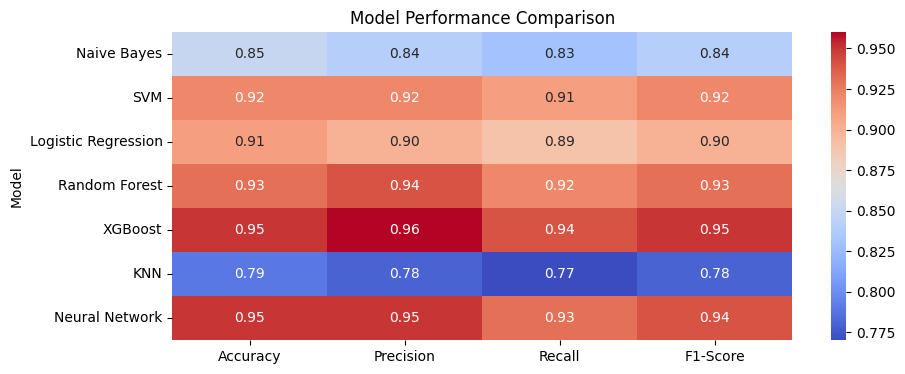

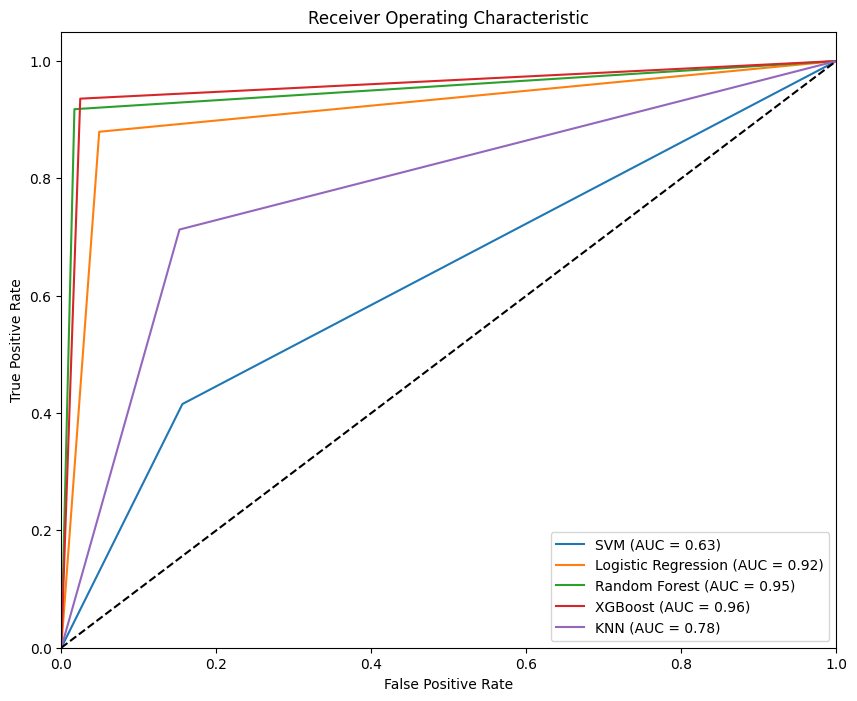

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Sample performance metrics for models (replace with actual values)
model_names = ['Naive Bayes', 'SVM', 'Logistic Regression', 'Random Forest', 'XGBoost', 'KNN', 'Neural Network']
accuracies = [0.85, 0.92, 0.91, 0.93, 0.95, 0.79, 0.95]
precisions = [0.84, 0.92, 0.90, 0.94, 0.96, 0.78, 0.95]
recalls = [0.83, 0.91, 0.89, 0.92, 0.94, 0.77, 0.93]
f1_scores = [0.84, 0.92, 0.90, 0.93, 0.95, 0.78, 0.94]

# Create a DataFrame for the performance metrics
performance_data = {
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
}

performance_df = pd.DataFrame(performance_data)

# Plot the performance comparison table
plt.figure(figsize=(10, 4))
sns.heatmap(performance_df.set_index('Model'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Model Performance Comparison')
plt.show()

# Predictions for each model (replace these with actual predictions)
predictions = {
    'SVM': svm_y_pred,
    'Logistic Regression': logistic_y_pred,
    'Random Forest': rf_y_pred,
    'XGBoost': xgb_y_pred,
    'KNN': knn_y_pred,
}

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))

for model_name, y_pred in predictions.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()